# Project Sales Analysis by Winston Susanto

#### Menginport pandas

In [1]:
import os
import pandas as pd

#### Mengabungkan data dari setiap bulan menjadi satu CSV

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

#### Drop rows of nan

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Mencari "Or" dan mendelete

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Mengkonvertsi columns ke type yang benar

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] = all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,11.95,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,11.95
2,176559,Bose SoundSport Headphones,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Augment data dengan additional columns

#### Add Month Columns

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add Sales Columns (cara kedua)

In [22]:
all_data['Sales'] = all_data['Quantity Ordered'] = all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,11.95,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,11.95
2,176559,Bose SoundSport Headphones,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add city columns

In [24]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Colum,City
0,176558,USB-C Charging Cable,11.95,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,11.95,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


### Soal

#### 1: Apa bulan terbaik untuk penjualan? Berapa banyak yang diperoleh bulan itu?

In [13]:
results = all_data.groupby('Month').sum()

C:\Users\winst\AppData\Local\Temp\ipykernel_16160\675579350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


range(1, 13)


C:\Users\winst\AppData\Local\Temp\ipykernel_16160\1377575674.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])


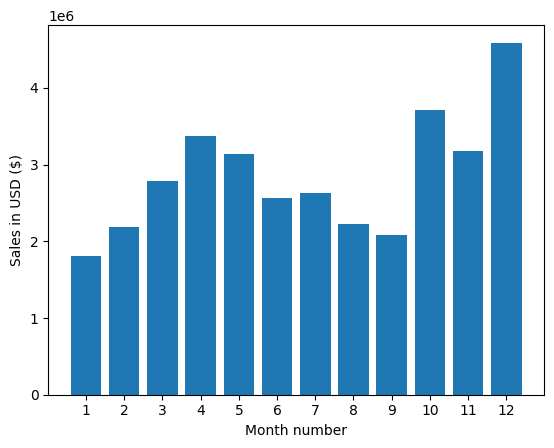

In [20]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### 2: Kota mana yang paling banyak menjual produk?

In [26]:
results = all_data.groupby('City').sum()
results

C:\Users\winst\AppData\Local\Temp\ipykernel_16160\2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),2779908.20,2779908.20,104794,2779908.20
Austin (TX),1809873.61,1809873.61,69829,1809873.61
Boston (MA),3637409.77,3637409.77,141112,3637409.77
Dallas (TX),2752627.82,2752627.82,104620,2752627.82
Los Angeles (CA),5421435.23,5421435.23,208325,5421435.23
New York City (NY),4635370.83,4635370.83,175741,4635370.83
Portland (ME),447189.25,447189.25,17144,447189.25
Portland (OR),1860558.22,1860558.22,70621,1860558.22
San Francisco (CA),8211461.74,8211461.74,315520,8211461.74


C:\Users\winst\AppData\Local\Temp\ipykernel_16160\3256609528.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]
C:\Users\winst\AppData\Local\Temp\ipykernel_16160\3256609528.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])


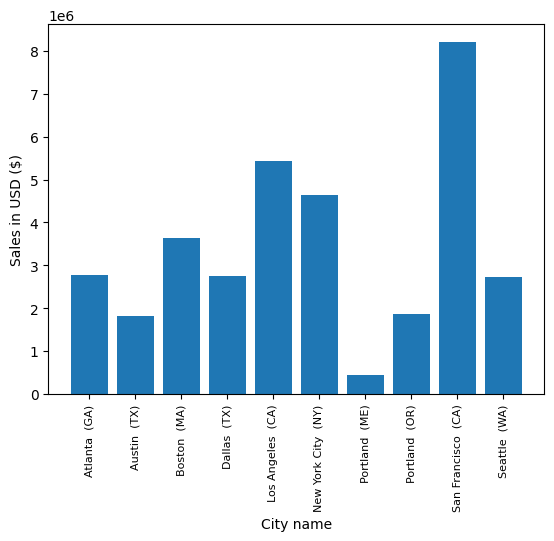

In [28]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### 3: Jam ke berapa kita harus menampilkan iklan untuk memaksimalkan kemungkinan pelanggan membeli produk?

In [32]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [31]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Colum,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,11.95,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,11.95,"917 1st St, Dallas, TX 75001",Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"682 Chestnut St, Boston, MA 02215",Boston (MA),22,30,1
3,176560,Google Phone,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38,1
4,176560,Wired Headphones,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38,1
5,176561,Wired Headphones,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),9,27,1


C:\Users\winst\AppData\Local\Temp\ipykernel_16160\784508144.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


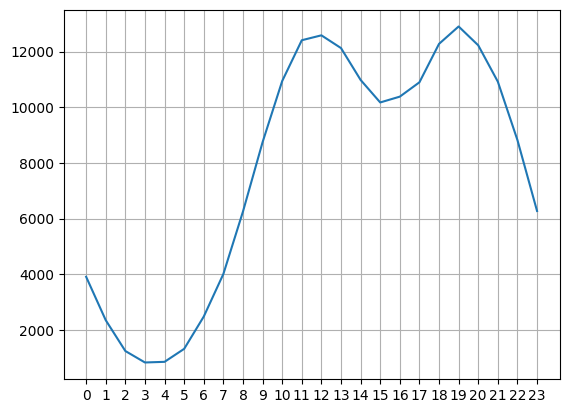

In [33]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### 4: Produk apa yang paling sering dijual bersamaan?

In [42]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)

C:\Users\winst\AppData\Local\Temp\ipykernel_16160\2532102542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [44]:
# Referensi: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### 5: Produk apa yang paling banyak terjual? Menurut Anda mengapa itu paling banyak terjual?

C:\Users\winst\AppData\Local\Temp\ipykernel_16160\3289712273.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


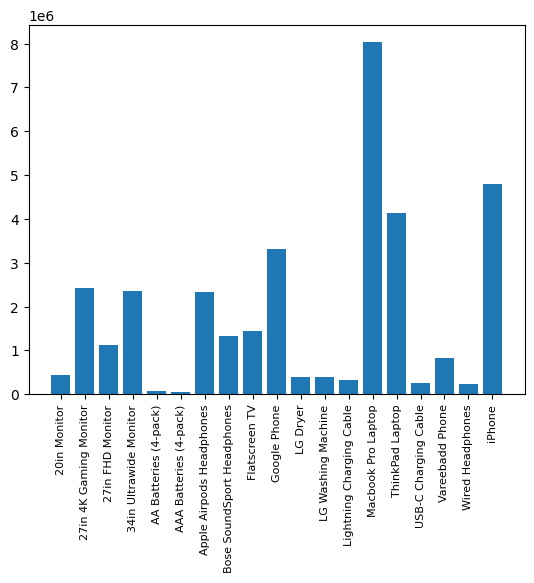

In [45]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [46]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\winst\AppData\Local\Temp\ipykernel_16160\2294271103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
